<a href="https://www.kaggle.com/code/sasankkanupuri/breast-cancer?scriptVersionId=153594224" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/breast_cancer.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/kaggle/input/breast-cancer/breast_cancer.csv')
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [4]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
print(round(df.describe(),2))

       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count           683.00                   683.00                    683.00   
mean              4.44                     3.15                      3.22   
std               2.82                     3.07                      2.99   
min               1.00                     1.00                      1.00   
25%               2.00                     1.00                      1.00   
50%               4.00                     1.00                      1.00   
75%               6.00                     5.00                      5.00   
max              10.00                    10.00                     10.00   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count             683.00                       683.00       683.00   
mean                2.83                         3.23         3.54   
std                 2.86                         2.22         3.64   
min                 1.00  

In [7]:
df.shape

(683, 10)

In [8]:
df_columns=df.columns
df_columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

<Axes: >

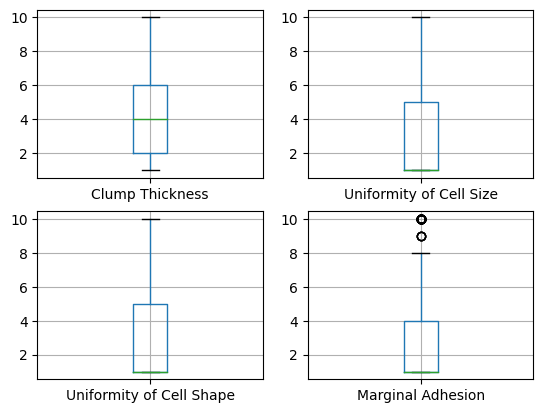

In [9]:
plt.subplot(2,2,1)
df.boxplot(column='Clump Thickness')   
plt.subplot(2,2,2)
df.boxplot(column='Uniformity of Cell Size')
plt.subplot(2,2,3)
df.boxplot(column='Uniformity of Cell Shape')
plt.subplot(2,2,4)
df.boxplot(column='Marginal Adhesion')

<Axes: >

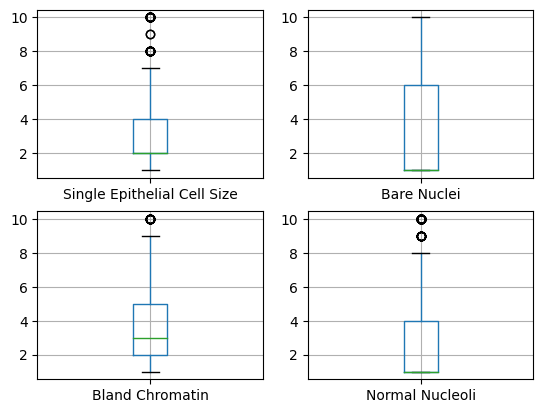

In [10]:
plt.subplot(2,2,1)
df.boxplot(column='Single Epithelial Cell Size')   
plt.subplot(2,2,2)
df.boxplot(column='Bare Nuclei')
plt.subplot(2,2,3)
df.boxplot(column='Bland Chromatin')
plt.subplot(2,2,4)
df.boxplot(column='Normal Nucleoli')

<Axes: >

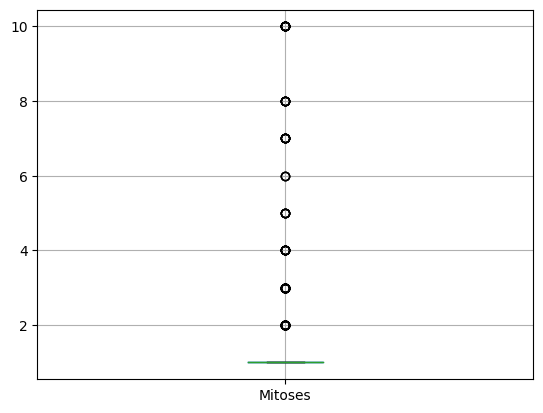

In [11]:
df.boxplot(column='Mitoses')

In [12]:
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [13]:
df['Class'].replace(2,0,inplace=True)
df['Class'].replace(4,1,inplace=True)

In [14]:
df.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1
682,4,8,8,5,4,5,10,4,1,1


In [15]:
X = df.drop(['Class'], axis=1)

Y = df['Class']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [17]:
x_train.shape , x_test.shape

((546, 9), (137, 9))

In [18]:
cols=x_train.columns
cols

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [20]:
x_train = pd.DataFrame(x_train, columns=cols)
x_test = pd.DataFrame(x_test, columns=cols)

In [21]:
x_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02
mean,-4.229421e-17,4.636096e-17,-3.904081e-17,4.554761e-17,-9.760202e-18,-4.473426e-17,-4.717431e-17,-2.602721e-17,-1.952040e-17
std,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00
min,-1.224684e+00,-6.978113e-01,-7.415257e-01,-6.336375e-01,-9.978971e-01,-6.827960e-01,-9.962873e-01,-6.215778e-01,-3.386374e-01
25%,-8.676752e-01,-6.978113e-01,-7.415257e-01,-6.336375e-01,-5.487200e-01,-6.827960e-01,-5.924470e-01,-6.215778e-01,-3.386374e-01
50%,-1.536576e-01,-6.978113e-01,-5.732493e-01,-6.336375e-01,-5.487200e-01,-6.827960e-01,-1.886067e-01,-6.215778e-01,-3.386374e-01
75%,5.603600e-01,6.036575e-01,6.046856e-01,4.297828e-01,3.496342e-01,4.275737e-01,6.190739e-01,3.453210e-01,-3.386374e-01
max,1.988395e+00,2.230493e+00,2.287450e+00,2.556623e+00,3.044697e+00,1.815536e+00,2.638275e+00,2.279119e+00,4.765854e+00


In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [23]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0])

In [24]:
np.unique(y_pred_test,return_counts=True)

(array([0, 1]), array([87, 50]))

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

0.9562043795620438

In [26]:
y_pred_train = logreg.predict(x_train)
y_pred_train

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [27]:
accuracy_score(y_train, y_pred_train)

0.9743589743589743

In [28]:
y_test.value_counts()

Class
0    87
1    50
Name: count, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[84,  3],
       [ 3, 47]])

<Axes: >

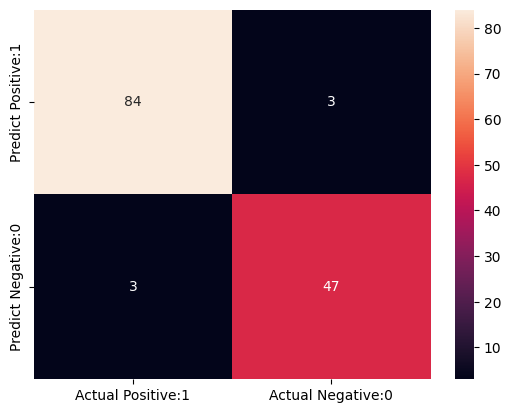

In [30]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        87
           1       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [32]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

classification_accuracy

0.9562043795620438

In [33]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

classification_error

0.043795620437956206

In [34]:
y_pred1 = logreg.predict_proba(x_test)[:, 1]
y_pred2 = (y_pred1 > 0.4).astype(int)
np.unique(y_pred2,return_counts=True)

(array([0, 1]), array([85, 52]))

In [35]:
y_pred1 = logreg.predict_proba(x_test)[:, 1]
y_pred2 = (y_pred1 > 0.6).astype(int)
np.unique(y_pred2,return_counts=True)

(array([0, 1]), array([89, 48]))

In [36]:
three=0.5
class_weig={0:three,1:1-three}
logreg_1 = LogisticRegression(class_weight=class_weig, random_state=0)
logreg_1.fit(x_train, y_train)

LogisticRegression(class_weight={0: 0.5, 1: 0.5}, random_state=0)

In [37]:
y_pred_test1=logreg_1.predict(x_test)
y_pred_test1

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0])

In [38]:
accuracy_score(y_test,y_pred_test1)

0.9562043795620438

In [39]:
output = pd.DataFrame({'Class':y_pred_test})
output

,Class
0,0
1,0
2,1
3,1
4,0
...,...
132,1
133,0
134,0
135,1


In [40]:
output.to_csv('submission.csv',index=False)
print("Submission saved successfully")

Submission saved successfully
